In [1]:
# Bibliotecas principais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo para os gráficos
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Carregar os dodos
df = pd.read_csv('superstore.csv', encoding='latin-1')

# Visualizar as primeiras cinco linhas
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Informações gerais
df.info()

# Estatísticas básicas
df.describe()

# Listar as colunas
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
# Verificar valores ausentes por coluna
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Verificar linhas duplicadas
print(f"Linhas duplicadas: {df.duplicated().sum()}")

Linhas duplicadas: 0


In [6]:
# Remover duplicatas (se houver)
df = df.drop_duplicates()

In [7]:
# Verificar tipos de dados
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [8]:
# Converter colunas de data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

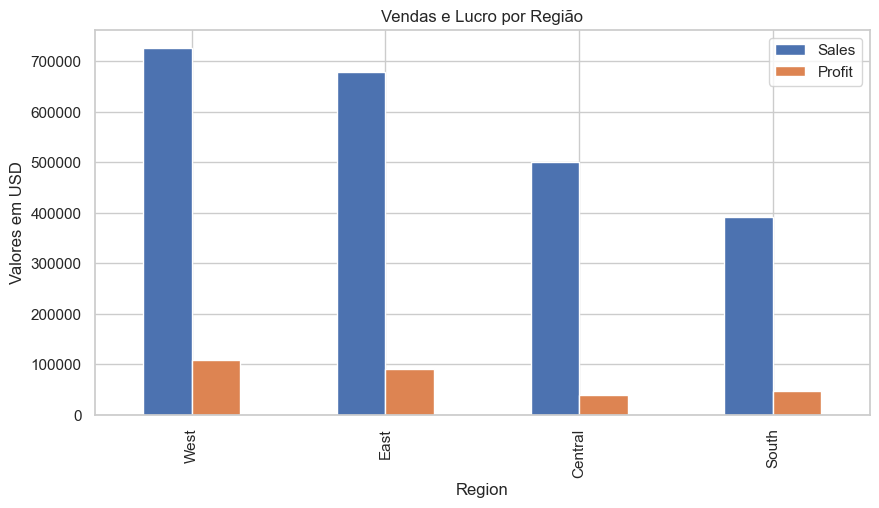

In [9]:
# Vendas por Região (Quais são as regiões com mais venda e lucro?)
region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
region_sales.plot(kind='bar', figsize=(10,5))
plt.title('Vendas e Lucro por Região')
plt.ylabel('Valores em USD')
plt.show()

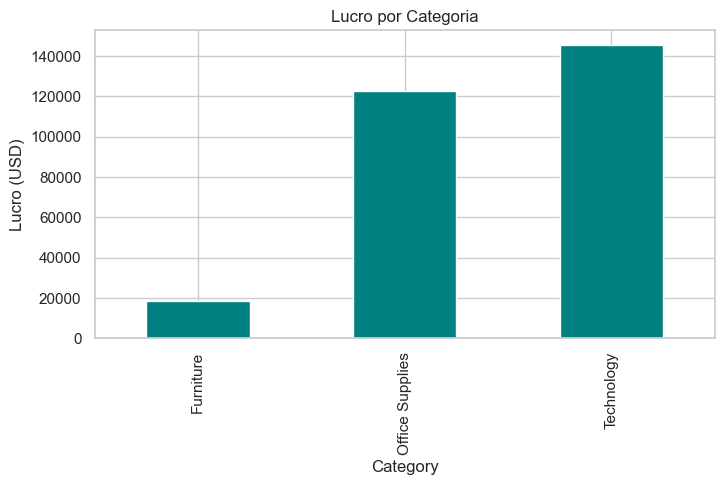

In [10]:
# Lucro por categoria de produto
category_profit = df.groupby('Category')['Profit'].sum().sort_values()
category_profit.plot(kind='bar', color='teal', figsize=(8,4))
plt.title('Lucro por Categoria')
plt.ylabel('Lucro (USD)')
plt.show()

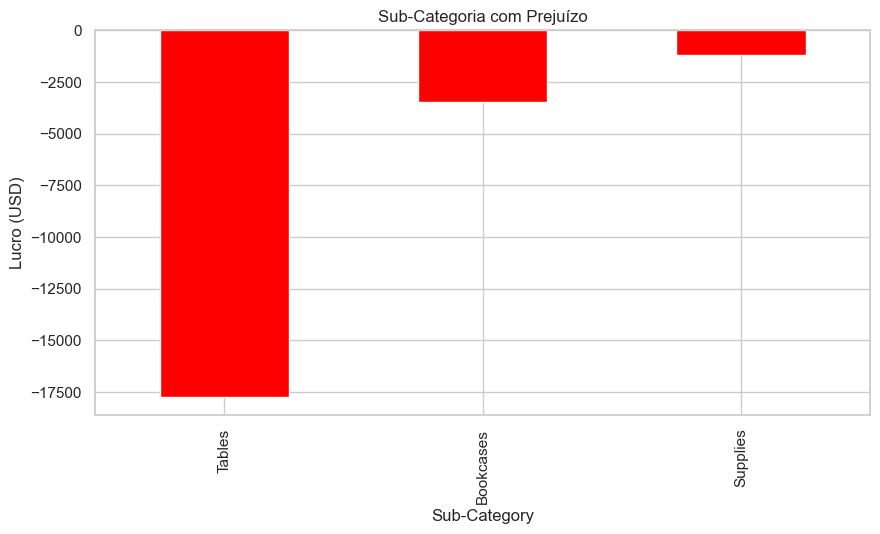

In [11]:
# Subcategorias com prejuízo
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcategory_profit[subcategory_profit < 0].plot(kind='bar', color='red', figsize=(10,5))
plt.title('Sub-Categoria com Prejuízo')
plt.ylabel('Lucro (USD)')
plt.show()

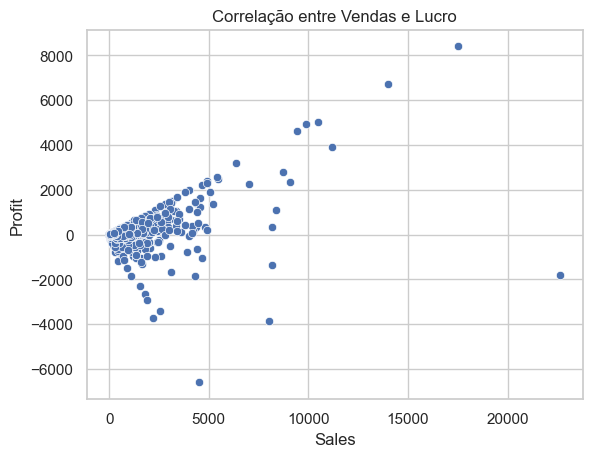

In [12]:
# Correlação entre Vendas e Lucro
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title('Correlação entre Vendas e Lucro')
plt.show()

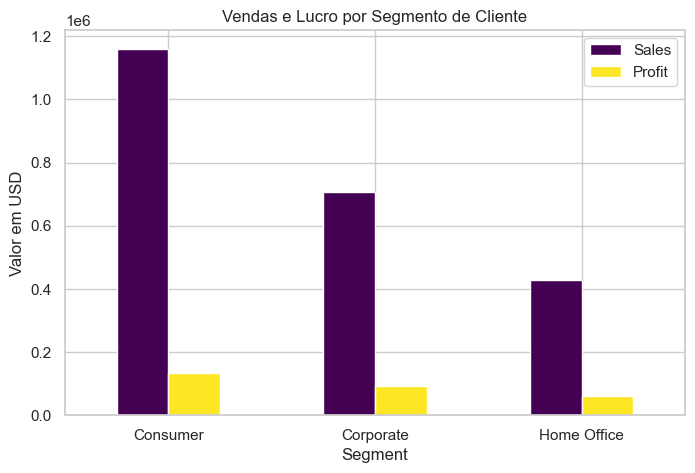

In [13]:
# Vendas e Lucro por Segmento de Cliente
segment = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
segment.plot(kind='bar', figsize=(8,5), colormap='viridis')
plt.title('Vendas e Lucro por Segmento de Cliente')
plt.ylabel('Valor em USD')
plt.xticks(rotation=0)
plt.show()

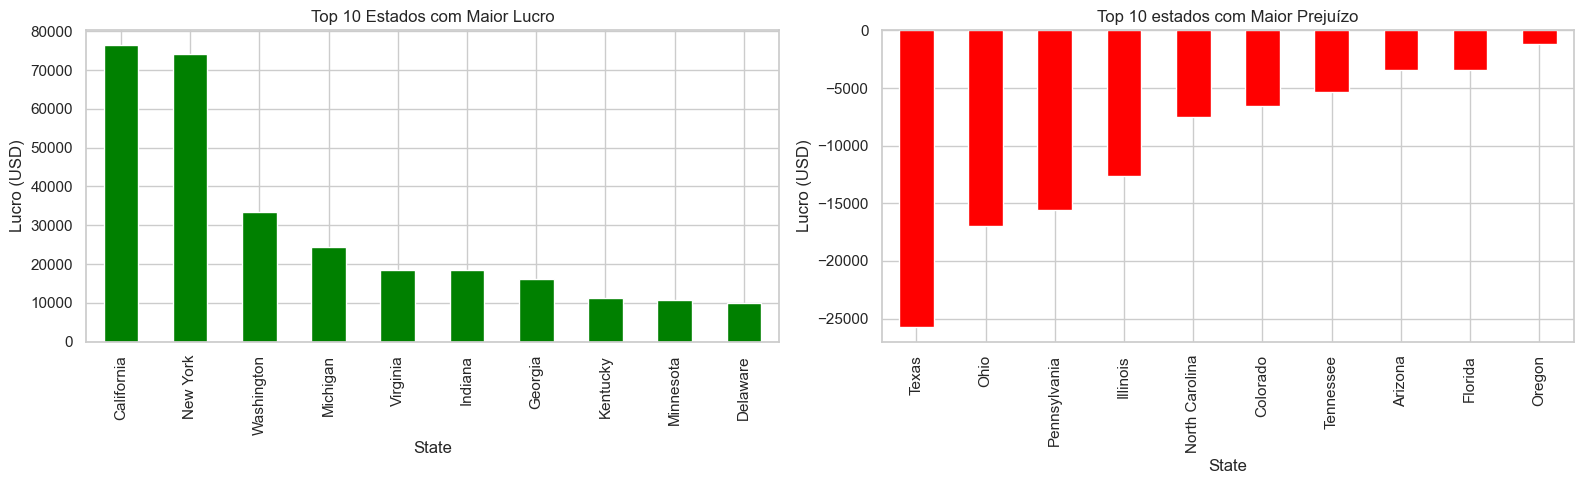

In [14]:
# Top 10 estados com maior lucro
top_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)

# Top 10 estados com maior prekuízo
bottom_states = df.groupby('State')['Profit'].sum().sort_values().head(10)

# Plotar os dois
fig, axes = plt.subplots(1, 2, figsize=(16,5))

top_states.plot(kind='bar', ax=axes[0], color='green', title='Top 10 Estados com Maior Lucro')
bottom_states.plot(kind='bar', ax=axes[1], color='red', title='Top 10 estados com Maior Prejuízo')

axes[0].set_ylabel('Lucro (USD)')
axes[1].set_ylabel('Lucro (USD)')
plt.tight_layout()
plt.show()

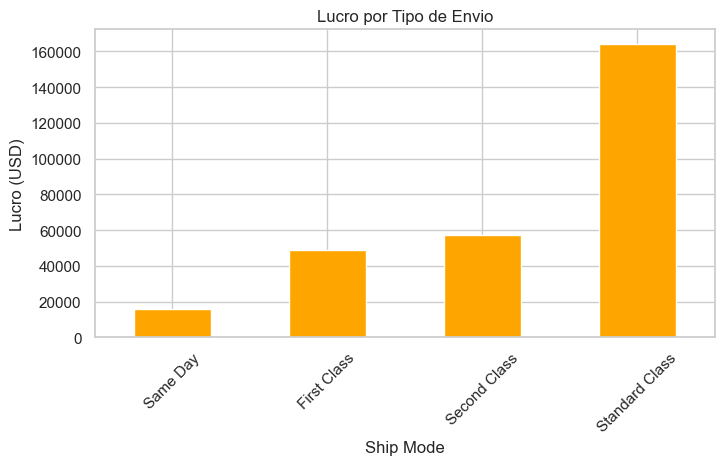

In [15]:
# Lucro por tipo de Envio
ship_profit = df.groupby('Ship Mode')['Profit'].sum().sort_values()
ship_profit.plot(kind='bar', color='orange', figsize=(8,4))
plt.title('Lucro por Tipo de Envio')
plt.ylabel('Lucro (USD)')
plt.xticks(rotation=45)
plt.show()

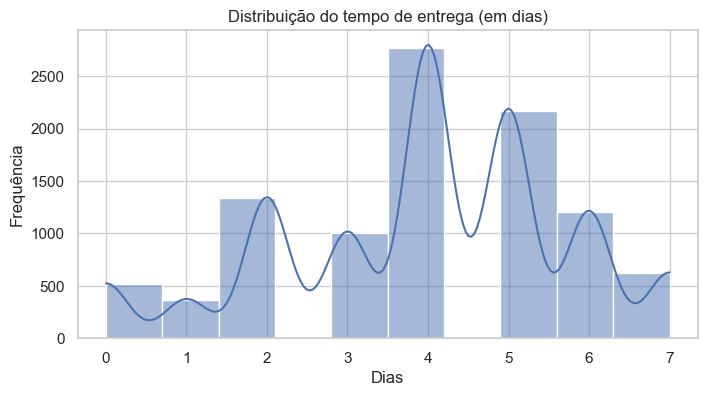

In [16]:
# Distribuição do Tempo de Entrega

# Criar nova coluna com o tempo de entrega
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Histograma do tempo de entrega
plt.figure(figsize=(8,4))
sns.histplot(df['Delivery Time'], bins=10, kde=True)
plt.title('Distribuição do tempo de entrega (em dias)')
plt.xlabel('Dias')
plt.ylabel('Frequência')
plt.show()

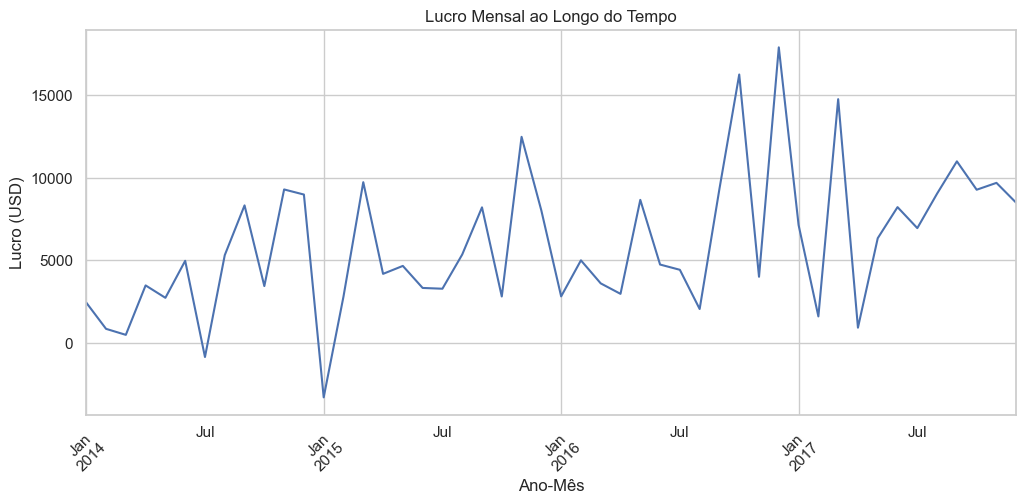

In [17]:
# Lucro por Mês e Ano

# Criar coluna de ano-mês
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# Agrupar
monthly_profit = df.groupby('YearMonth')['Profit'].sum()

# Plotar
monthly_profit.plot(figsize=(12,5))
plt.title('Lucro Mensal ao Longo do Tempo')
plt.ylabel('Lucro (USD)')
plt.xlabel('Ano-Mês')
plt.xticks(rotation=45)
plt.show()